### World Happiness Report Project
#### Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

#### What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

#### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

#### You need to predict the happiness score considering all the other factors mentioned in the dataset.


In [292]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

#### Importing data

In [293]:
#read data from github link
data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### We need to pridict Happiness Score, so Happiness Score will be our Target varialbe / Label

### # EDA

In [294]:
data.shape

(158, 12)

Rows : 158 ,  Couumns : 12

In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

#### Object data type : Country and Region Columns    ,   
#### Int data type: Happiness Rank column   ,   
#### Float data type: Rest of all columns

#### Seems to be having NO Null values in data

In [296]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [297]:
data.Country.value_counts()

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64

No null values in Country column

In [298]:
data.Region.value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

No null values in Region column

In [299]:
data['Happiness Rank'].value_counts()

82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64

No null values in 'Happiness Rank' column

In [300]:
data['Happiness Score'].value_counts()

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness Score, Length: 157, dtype: int64

No null values in 'Happiness Score' column

In [301]:
data['Standard Error'].value_counts()

0.03780    2
0.03751    2
0.04394    2
0.05051    2
0.04934    2
          ..
0.04114    1
0.04251    1
0.03843    1
0.05371    1
0.06727    1
Name: Standard Error, Length: 153, dtype: int64

No null values in 'Standard Error' column

In [302]:
data['Economy (GDP per Capita)'].value_counts()

1.39651    1
0.39753    1
1.15406    1
1.02564    1
1.12094    1
          ..
1.12254    1
1.18498    1
1.14723    1
0.59325    1
0.20868    1
Name: Economy (GDP per Capita), Length: 158, dtype: int64

No null values in 'Economy (GDP per Capita)' column

In [303]:
data['Family'].value_counts()

1.34951    1
0.43106    1
0.92933    1
0.80001    1
1.20215    1
          ..
1.12241    1
1.27385    1
1.25745    1
1.14184    1
0.13995    1
Name: Family, Length: 158, dtype: int64

No null values in 'Family' column

In [304]:
data['Health (Life Expectancy)'].value_counts()

0.92356    2
0.94143    1
0.60268    1
0.88213    1
0.83947    1
          ..
0.66098    1
0.64368    1
0.87337    1
0.73128    1
0.28443    1
Name: Health (Life Expectancy), Length: 157, dtype: int64

No null values in 'Health (Life Expectancy)' column

In [305]:
data['Freedom'].value_counts()

0.66557    1
0.40820    1
0.07699    1
0.33916    1
0.32112    1
          ..
0.51649    1
0.60855    1
0.21342    1
0.55475    1
0.36453    1
Name: Freedom, Length: 158, dtype: int64

No null values in 'Freedom' column

In [306]:
data['Trust (Government Corruption)'].value_counts()

0.32524    2
0.07625    1
0.01397    1
0.04582    1
0.02758    1
          ..
0.03787    1
0.01031    1
0.19317    1
0.05989    1
0.10731    1
Name: Trust (Government Corruption), Length: 157, dtype: int64

No null values in 'Trust (Government Corruption)' column

In [307]:
data['Generosity'].value_counts()

0.29678    1
0.21222    1
0.00000    1
0.21854    1
0.12800    1
          ..
0.11827    1
0.25328    1
0.02641    1
0.27815    1
0.16681    1
Name: Generosity, Length: 158, dtype: int64

No null values in 'Generosity' column

In [308]:
data['Dystopia Residual'].value_counts()

2.51738    1
2.51767    1
1.80101    1
1.57059    1
1.24074    1
          ..
2.24729    1
1.61583    1
2.44649    1
2.32407    1
1.56726    1
Name: Dystopia Residual, Length: 158, dtype: int64

No null values in 'Dystopia Residual' column

### Obeservation : 
#### 1.  Target column - ' Happiness Score ' is having continious data , hence our problem statement is related to Regression
#### 2.  NO NULL / Blank value present in the data

### # Encoder for treating object data

As we have two columns having Object data type 'Country' and 'Region'

In [309]:
data.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [310]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df = lab_enc.fit_transform(data['Country'])
pd.Series(df)
data['Country']=df

df = lab_enc.fit_transform(data['Region'])
pd.Series(df)
data['Region']=df

#converting the data type to float
data['Country']=data['Country'].astype(float)
data['Region']=data['Region'].astype(float)
data['Happiness Rank']=data['Happiness Rank'].astype(float)

In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    float64
 1   Region                         158 non-null    float64
 2   Happiness Rank                 158 non-null    float64
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(12)
memory usage: 14.9 KB


In [312]:
#checking the data for encoding
data.sample(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
84,156.0,8.0,85.0,5.129,0.06988,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,2.63430
127,17.0,8.0,128.0,4.332,0.04934,0.99355,1.10464,0.04776,0.49495,0.12474,0.10461,1.46181
92,83.0,1.0,93.0,5.007,0.05376,0.91851,1.00232,0.73545,0.33457,0.05327,0.22359,1.73933
74,154.0,6.0,75.0,5.360,0.03107,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173
153,118.0,8.0,154.0,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
83,28.0,2.0,84.0,5.140,0.02424,0.89012,0.94675,0.81658,0.51697,0.02781,0.08185,1.86040
129,48.0,1.0,130.0,4.297,0.04221,0.74190,0.38562,0.72926,0.40577,0.38331,0.05547,1.59541
32,29.0,3.0,33.0,6.477,0.05051,0.91861,1.24018,0.69077,0.53466,0.05120,0.18401,2.85737
80,107.0,7.0,81.0,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709
73,60.0,6.0,74.0,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.00000,0.51535,1.86399


##### Our data is encoded and converted to float64 dtype, so our Encoding step completed here

### EDA Continue

Looking into basic stats


In [313]:
data.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


"Country" and "Region" columns are catagorical in nature so we will ignore the stats for these two columns

#### Observations:

1. mean and 50% of all the columns are almost same except for "Trust (Government COrruption)" column, so data distribution is areound the mean     
2. STD are on very high side for all the columns    
3. observing skewness in data for the columns "Trust (Government COrruption)" and "Generosity" on max side

#### Check for data distribution

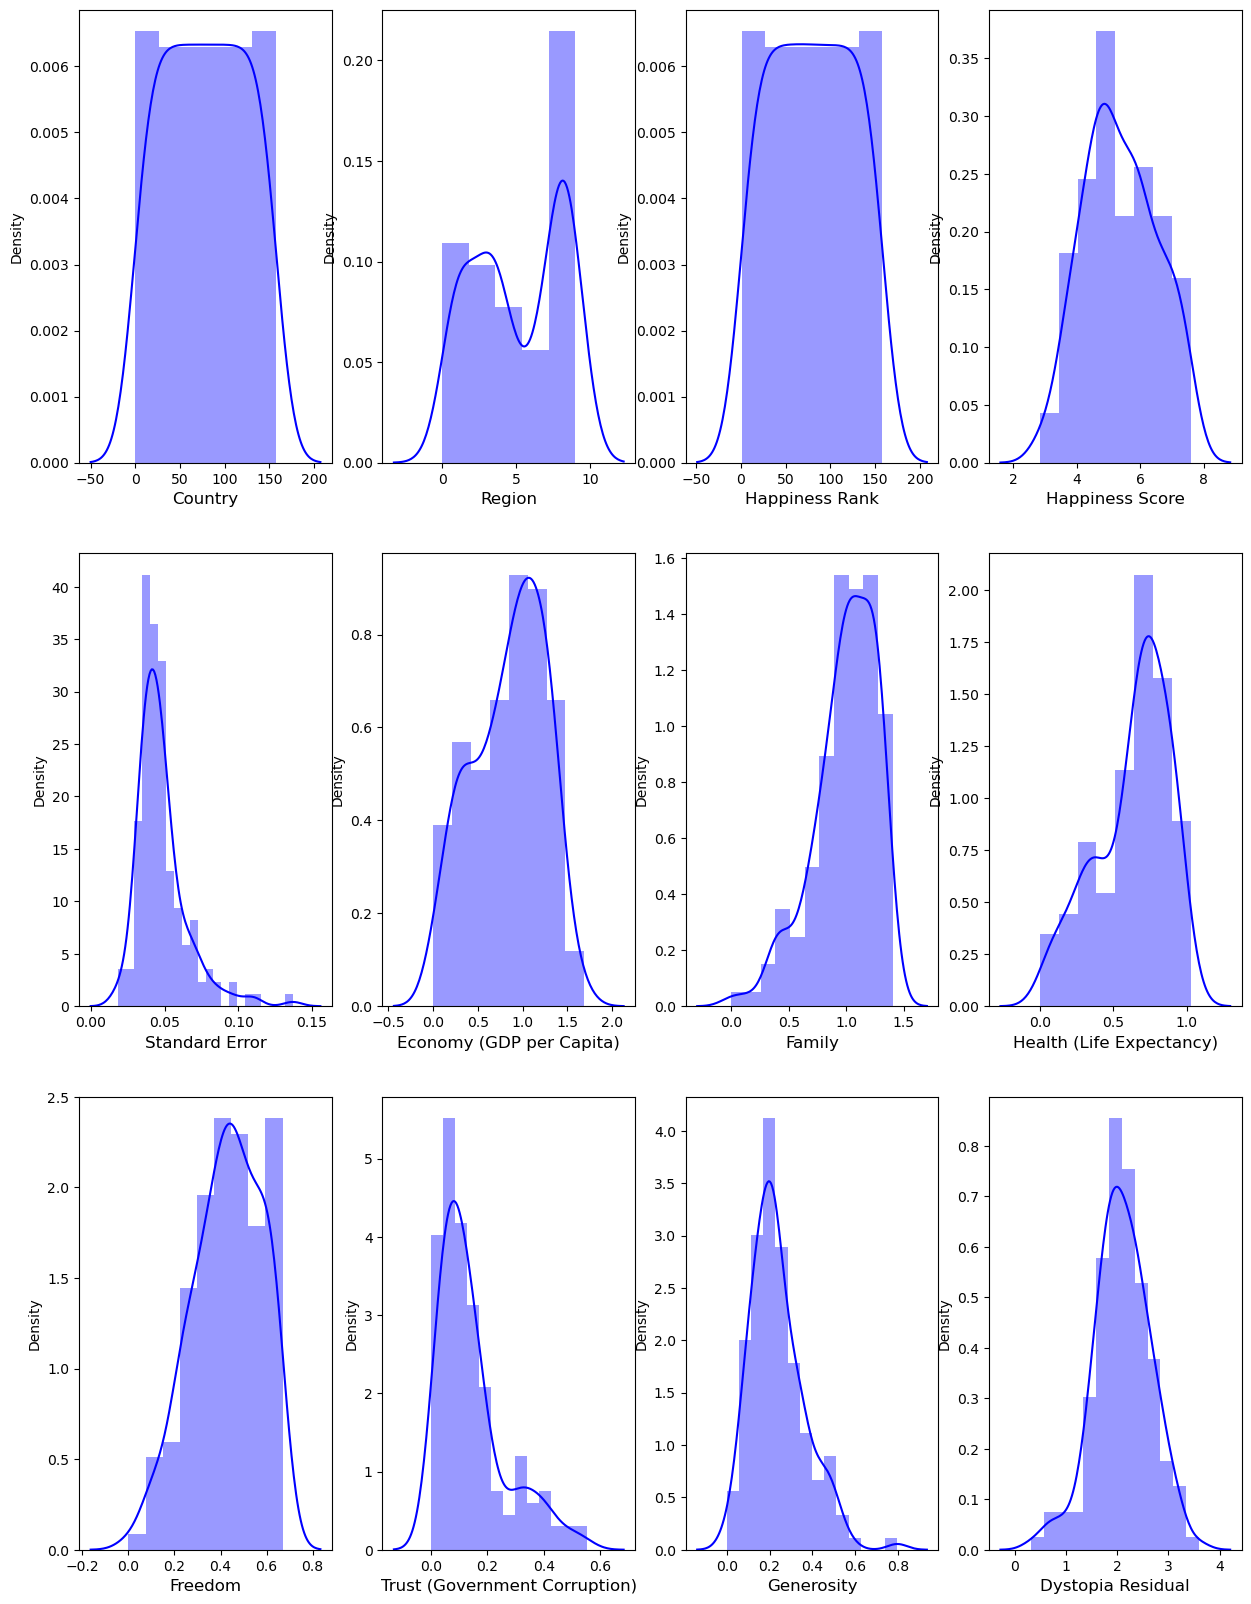

In [314]:
plt.figure(figsize=(15,20))
pltno=1
for column in data:
    if pltno<=12:
        plt.subplot(3,4,pltno)
        sns.distplot(data[column], color='b')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### Skewness

Skewness on left side for columns : 'Family', 'Health (Life Expectancy)', 'Freedom' and 'Dystopia Residual' columns

Skewness on Right side for columns : 'Standard Error', 'Trust (Government Corruption)' and 'Generosity' columns

#### Check with BOX plot for outliers detection

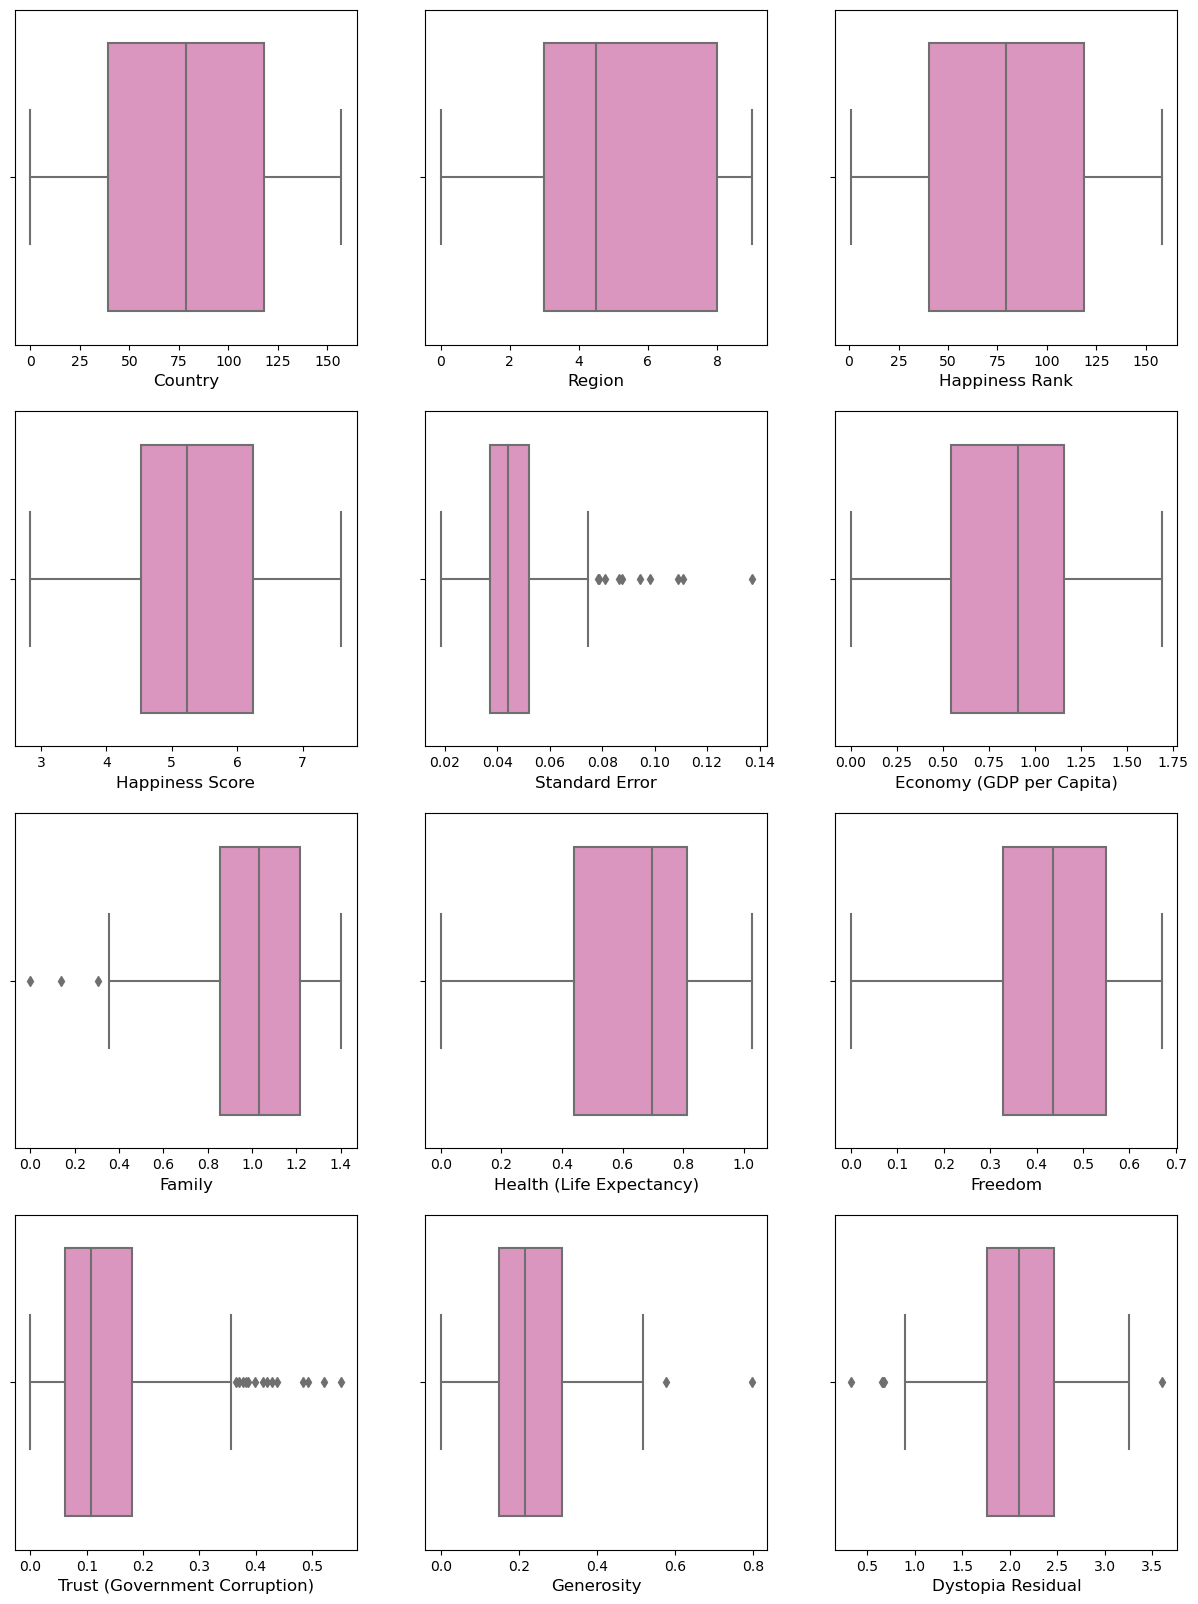

In [315]:
plt.figure(figsize=(15,20))
pltno=1
for column in data:
    if pltno<=12:
        plt.subplot(4,3,pltno)
        sns.boxplot(data[column], color='red', palette='Set2_r')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### Observation:

1. There is outliers on Max side for columns : 'Standard Error' , 'Trust (Government Corruption)' and 'Generosity'     
2. There is outliers on Min side for columns : 'Family'      
3. There is outliers on Both sides for column: 'Dystopia Residual'

##### Checking for skewness value

In [316]:
for column in data:
    print(column, "  :   ", data[column].skew())

Country   :    0.0
Region   :    -0.11611942626841033
Happiness Rank   :    0.00041846932380538553
Happiness Score   :    0.09776909409344678
Standard Error   :    1.9834393956708816
Economy (GDP per Capita)   :    -0.3175746523312048
Family   :    -1.0068931265421133
Health (Life Expectancy)   :    -0.7053284856924459
Freedom   :    -0.41346197289710274
Trust (Government Corruption)   :    1.3854625954673152
Generosity   :    1.001960575563042
Dystopia Residual   :    -0.23891080938012677


Right Skewness seen for the columns:      
Standard Error   :    1.9834393956708816   ,   
Trust (Government Corruption)   :    1.3854625954673152   ,   
Generosity   :    1.001960575563042     

Left Skewness seen for the columns:       
Family   :    -1.0068931265421133         

Yes we can ignore the skewness for 'Health (Life Expectancy)' column as it is moderately skewed as value lies between 0.5 and 1 so we can ignore      
also we can ignore the skewness for the columns 'Family' and 'Generosity' as these columns are close to 1, and can be taken as moderately skewed

#### Since the columns "Happiness Rank", "Standard Error" and "Dystopia Residual" are not Independent columns, they are derived from other columns, so we are dropping theme here,  Also the Columns Country and Region are catagorical data (name of the country & Region) so we are dropping these columns as well

In [317]:
data=data.drop(['Happiness Rank', 'Dystopia Residual', 'Country','Region'], axis=1)
data.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [318]:
# Again checking for skewness
for column in data:
    print(column, "  :   ", data[column].skew())

Happiness Score   :    0.09776909409344678
Standard Error   :    1.9834393956708816
Economy (GDP per Capita)   :    -0.3175746523312048
Family   :    -1.0068931265421133
Health (Life Expectancy)   :    -0.7053284856924459
Freedom   :    -0.41346197289710274
Trust (Government Corruption)   :    1.3854625954673152
Generosity   :    1.001960575563042


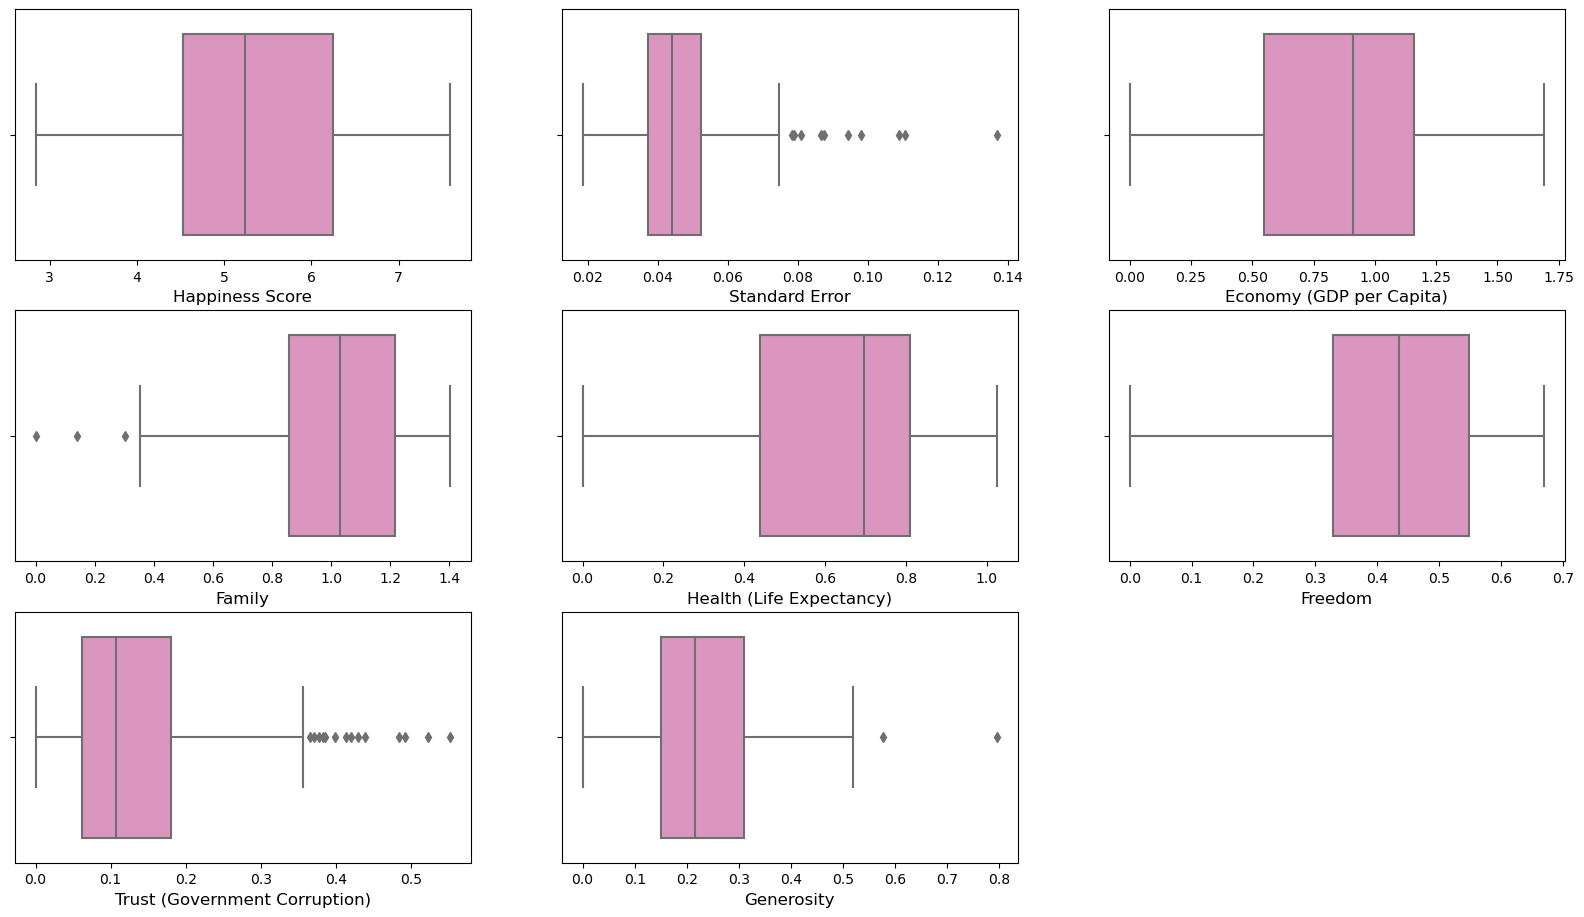

In [319]:
plt.figure(figsize=(20,15))
pltno=1
for column in data:
    if pltno<=12:
        plt.subplot(4,3,pltno)
        sns.boxplot(data[column], color='red', palette='Set2_r')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### Removing outliers

As we having very less Rows (158 only) so we can not go for deletion of the outliers it will reduce our data

In [366]:
# Log method for Right skewed columns
temp=data[[ 'Trust (Government Corruption)', 'Generosity', 'Standard Error']]
log_temp=np.log(temp)
log_temp.skew()

Trust (Government Corruption)         NaN
Generosity                            NaN
Standard Error                   0.484623
dtype: float64

both the columns are containing '0' hence getting NaN

In [367]:
#check for the 0 value
zero_index = temp.loc[data['Trust (Government Corruption)'] == 0].index
zero_index

Int64Index([73], dtype='int64')

So the index number 73 is containing '0.0' value

In [368]:
temp.iloc[zero_index]

,Trust (Government Corruption),Generosity,Standard Error
73,0.0,0.717879,0.02596


In [369]:
# dropping the Row with 0.0 value
temp=temp.drop(zero_index)
temp.reset_index(drop=True)


,Trust (Government Corruption),Generosity,Standard Error
0,0.647904,0.544775,0.03411
1,0.376098,0.660530,0.04884
2,0.695392,0.584286,0.03328
3,0.604177,0.589059,0.03880
4,0.574082,0.676838,0.03553
...,...,...,...
152,0.742906,0.475689,0.03464
153,0.283019,0.427317,0.03656
154,0.434810,0.686870,0.05015
155,0.317207,0.444151,0.08658


In [370]:
#check for the 0 value
zero_index = temp.loc[data['Generosity'] == 0].index
zero_index

Int64Index([101], dtype='int64')

In [371]:
# dropping the Row with 0.0 value
temp=temp.drop(zero_index)
temp.reset_index(drop=True)

,Trust (Government Corruption),Generosity,Standard Error
0,0.647904,0.544775,0.03411
1,0.376098,0.660530,0.04884
2,0.695392,0.584286,0.03328
3,0.604177,0.589059,0.03880
4,0.574082,0.676838,0.03553
...,...,...,...
151,0.742906,0.475689,0.03464
152,0.283019,0.427317,0.03656
153,0.434810,0.686870,0.05015
154,0.317207,0.444151,0.08658


In [372]:
# Rechecking skewness with log method
log_temp=np.log(temp)
log_temp.skew()

Trust (Government Corruption)   -0.795557
Generosity                      -2.446192
Standard Error                   0.506158
dtype: float64

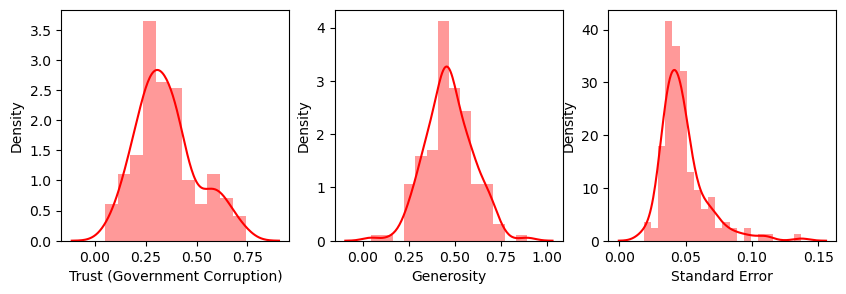

In [373]:
plt.figure(figsize=(10,3))
pltno=1
for column in temp:
    if pltno<=3:
        plt.subplot(1,3,pltno)
        sns.distplot(temp[column], color='r')
        plt.xlabel(column)
    pltno+=1
plt.show()

In [375]:
# square root method for Right skewed columns
temp=data[[ 'Trust (Government Corruption)', 'Generosity', 'Standard Error']]
log_temp=np.sqrt(temp)
log_temp.skew()

Trust (Government Corruption)   -0.420507
Generosity                      -1.792112
Standard Error                   1.225889
dtype: float64

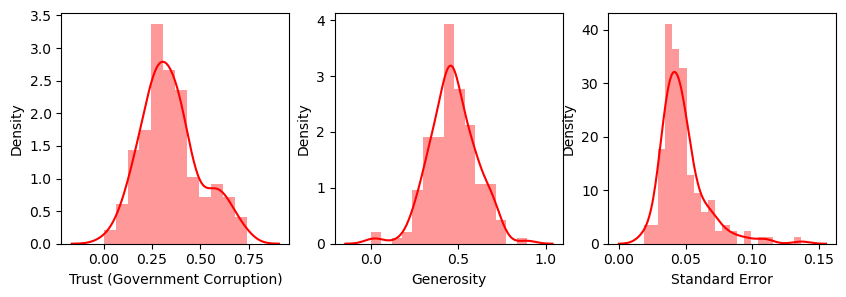

In [376]:
plt.figure(figsize=(10,3))
pltno=1
for column in temp:
    if pltno<=3:
        plt.subplot(1,3,pltno)
        sns.distplot(temp[column], color='r')
        plt.xlabel(column)
    pltno+=1
plt.show()

In [377]:
# Cube root method for Right skewed columns
temp=data[[ 'Trust (Government Corruption)', 'Generosity', 'Standard Error']]
log_temp=np.cbrt(temp)
log_temp.skew()

Trust (Government Corruption)   -1.372297
Generosity                      -3.496792
Standard Error                   0.979748
dtype: float64

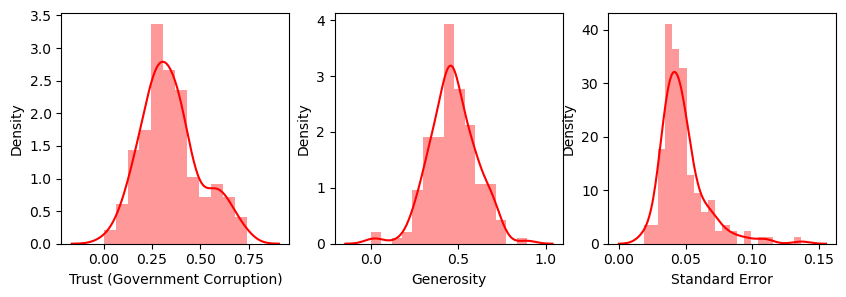

In [378]:
plt.figure(figsize=(10,3))
pltno=1
for column in temp:
    if pltno<=3:
        plt.subplot(1,3,pltno)
        sns.distplot(temp[column], color='r')
        plt.xlabel(column)
    pltno+=1
plt.show()

In [379]:
# Square method for Left skewed columns
temp=data[[ 'Family','Health (Life Expectancy)' ]]
log_temp=np.square(temp)
log_temp.skew()

Family                      0.479044
Health (Life Expectancy)    0.884747
dtype: float64

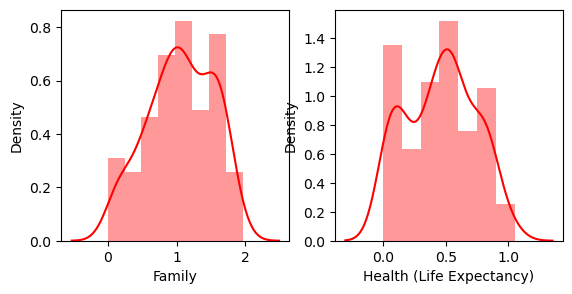

In [380]:
plt.figure(figsize=(10,3))
pltno=1
for column in temp:
    if pltno<=3:
        plt.subplot(1,3,pltno)
        sns.distplot(temp[column], color='r')
        plt.xlabel(column)
    pltno+=1
plt.show()

In [381]:
# Cube method for Left skewed columns
temp=data[[ 'Family','Health (Life Expectancy)' ]]
log_temp=np.power(temp,3)
log_temp.skew()

Family                      0.940672
Health (Life Expectancy)    1.559560
dtype: float64

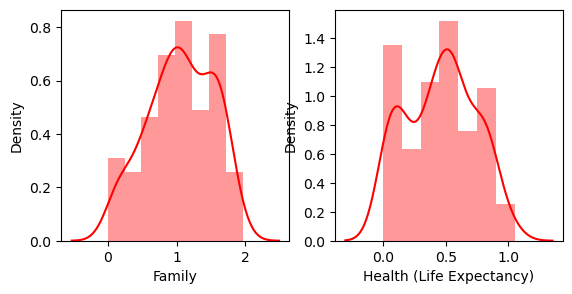

In [382]:
plt.figure(figsize=(10,3))
pltno=1
for column in temp:
    if pltno<=3:
        plt.subplot(1,3,pltno)
        sns.distplot(temp[column], color='r')
        plt.xlabel(column)
    pltno+=1
plt.show()

#### Finally we can select "Square root method" for Right skewness and "Square method" for Left skewness

In [383]:
# applying the Cube root method and cube method to data for removing skewness

data['Trust (Government Corruption)'] = np.sqrt(data['Trust (Government Corruption)'])
data['Generosity'] = np.sqrt(data['Generosity'])
data['Standard Error'] = np.log(data['Standard Error'])
data['Family'] = np.power(data['Family'], 2)
data['Health (Life Expectancy)'] = np.power(data['Health (Life Expectancy)'], 2)

In [384]:
# re-checking skewness
data.skew()

Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                           0.479044
Health (Life Expectancy)         0.884747
Freedom                         -0.413462
Trust (Government Corruption)   -0.420507
Generosity                      -1.792112
dtype: float64

#### Dist plot

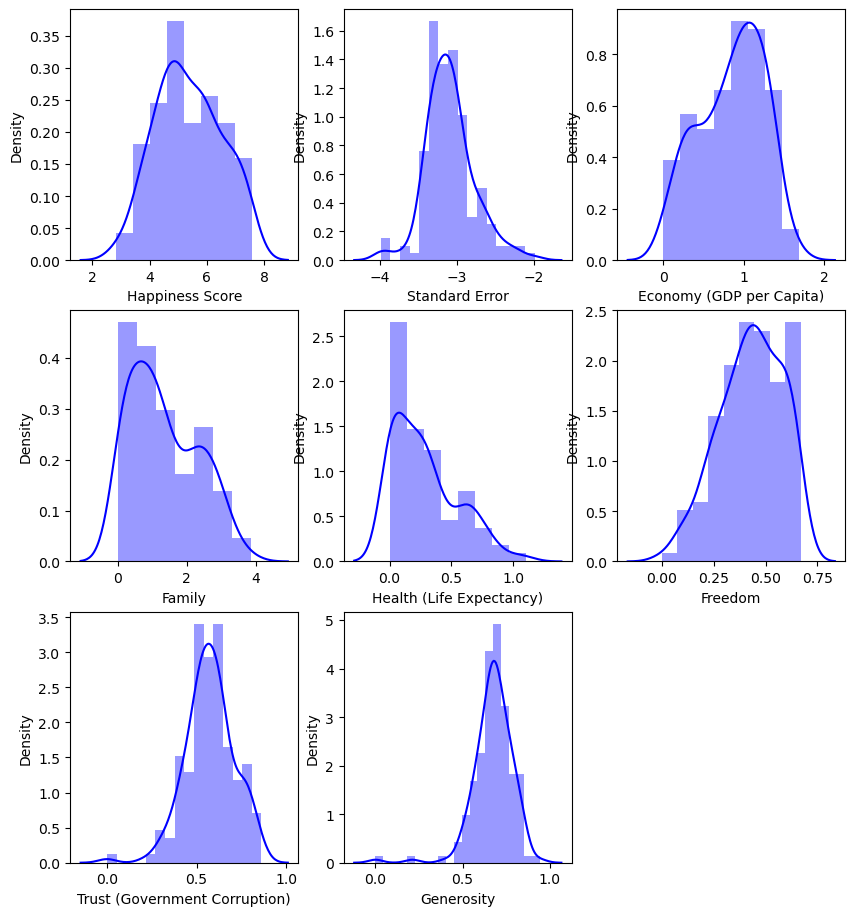

In [385]:
plt.figure(figsize=(10,15))
pltno=1
for column in data:
    if pltno<=12:
        plt.subplot(4,3,pltno)
        sns.distplot(data[column], color='b')
        plt.xlabel(column)
    pltno+=1
plt.show()

#### Distribution is better now

### Check for multi corelation

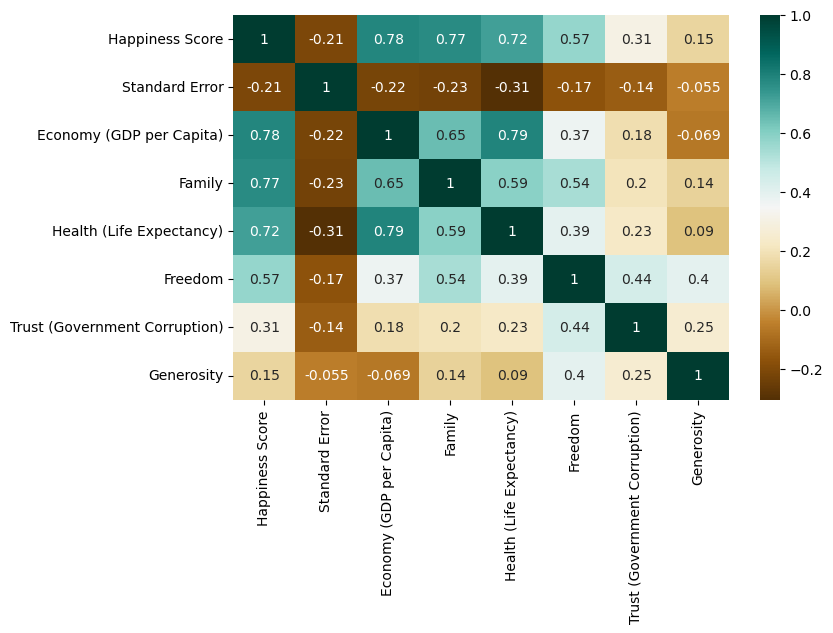

In [386]:
cor=data.corr()
plt.figure(figsize=(8,5))

sns.heatmap(data=cor, annot=True, cmap='BrBG')
plt.show()

#### There are multi co-linearity in the data as many values are greater than 0.7 

#### Checking with VIF score

In [387]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### seperating features and label

In [388]:
X=data.drop(['Happiness Score'], axis=1)
y=data['Happiness Score']
print('Feature shape', X.shape)
print('Label shape', y.shape)

Feature shape (158, 7)
Label shape (158,)


Feature to be Scaled by Standard Scaler

In [389]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,-0.915376,1.369621,2.022329,1.904975,1.577438,1.714093,0.561592
1,0.229364,1.135226,2.584714,1.987325,1.332456,0.292479,1.229442
2,-0.993935,1.192861,2.135096,1.141809,1.469659,1.929027,0.796884
3,-0.504531,1.525130,1.839391,1.251568,1.605131,1.509097,0.824761
4,-0.785305,1.194876,1.759641,1.475031,1.360416,1.363666,1.318664
...,...,...,...,...,...,...,...
153,-0.866206,-1.552987,-1.005673,-0.959386,1.087740,2.136855,0.128652
154,-0.694170,-1.392303,-1.356397,-1.048505,0.372033,-0.310364,-0.193521
155,0.313775,-0.455245,-1.320389,-0.053028,-1.809238,0.634670,1.373014
156,2.055159,-2.067566,-1.341830,-1.078424,-2.064472,-0.078825,-0.079428


In [390]:
# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Variable,VIF
0,Standard Error,1.117564
1,Economy (GDP per Capita),3.389541
2,Family,2.135426
3,Health (Life Expectancy),2.984562
4,Freedom,1.893130
5,Trust (Government Corruption),1.276503
6,Generosity,1.323612


#### Since all the values are less than 5 so multi colinearity is not there, and our data set is also very less so we are going with full data

### # Model Building

In [391]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [392]:
# Finding the best Random State
maxacc=0
maxrs=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    ln_pred=ln.predict(x_test)
    acc=r2_score(y_test,ln_pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("Max R2 Score is :  ", maxacc, "And @ Random State :  ", maxrs)
    

Max R2 Score is :   0.8831133825492455 And @ Random State :   193


In [393]:
x_train,x_test,y_train,y_test=train_test_split(X ,y ,test_size=0.25, random_state = maxrs)

In [394]:
# Linear Regression Model
ln=LinearRegression()
ln.fit(x_train,y_train)
ln_pred_test=ln.predict(x_test)
ln_pred_train=ln.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,ln_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,ln_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,ln_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,ln_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,ln_pred_test)))

R2 Score on Train data :   72.10700183697803  %
R2 Score on test data :   88.31133825492455  %
Mean Absolute Error :   0.3497350854136733
Mean Squared Error :   0.1836714051378405
Root Mean Squared Error :   0.42856902027309496


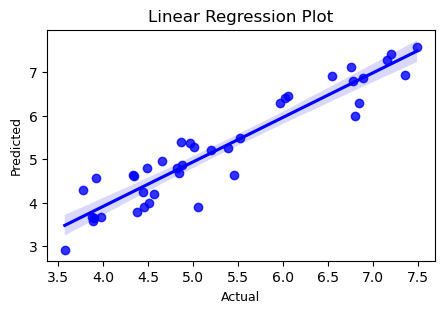

In [395]:
plt.figure(figsize=(5,3))
sns.regplot(x=ln_pred_test, y=y_test, color='b')
plt.xlabel('Actual', fontsize=9)
plt.ylabel('Predicted', fontsize=9)
plt.title('Linear Regression Plot', fontsize=12)
plt.show()

In [396]:
# importing more libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [397]:
# KNN model
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred_test=knn.predict(x_test)
knn_pred_train=knn.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,knn_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,knn_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,knn_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,knn_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,knn_pred_test)))

R2 Score on Train data :   76.29143215010467  %
R2 Score on test data :   78.67585924588529  %
Mean Absolute Error :   0.45734499999999983
Mean Squared Error :   0.33507983899999993
Root Mean Squared Error :   0.5788608114218823


In [398]:
# Random Forest Regressor model
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
RF_pred_test=RF.predict(x_test)
RF_pred_train=RF.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,RF_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,RF_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,RF_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,RF_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,RF_pred_test)))

R2 Score on Train data :   95.11203855785084  %
R2 Score on test data :   86.7432527488554  %
Mean Absolute Error :   0.3771222500000001
Mean Squared Error :   0.2083117339075003
Root Mean Squared Error :   0.45641180298881434


In [399]:
# Extra Trees Regressor model
et=ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred_test=et.predict(x_test)
et_pred_train=et.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,et_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,et_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,et_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,et_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,et_pred_test)))

R2 Score on Train data :   100.0  %
R2 Score on test data :   86.67037120821442  %
Mean Absolute Error :   0.3830030000000003
Mean Squared Error :   0.20945696809000017
Root Mean Squared Error :   0.45766468958179435


In [400]:
# Decision Tree Regressor model
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred_test=dt.predict(x_test)
dt_pred_train=dt.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,dt_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,dt_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,dt_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,dt_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,dt_pred_test)))

R2 Score on Train data :   100.0  %
R2 Score on test data :   63.99169102528024  %
Mean Absolute Error :   0.61915
Mean Squared Error :   0.5658215499999999
Root Mean Squared Error :   0.7522111073362318


In [401]:
# Ridge model
Ri=Ridge()
Ri.fit(x_train,y_train)
Ri_pred_test=Ri.predict(x_test)
Ri_pred_train=Ri.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,Ri_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,Ri_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,Ri_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,Ri_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,Ri_pred_test)))

R2 Score on Train data :   72.1046694504948  %
R2 Score on test data :   88.3178749984544  %
Mean Absolute Error :   0.35040948211197936
Mean Squared Error :   0.18356868911308624
Root Mean Squared Error :   0.4284491674785776


In [402]:
# Gradient Boosting Regressor model
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred_test=gb.predict(x_test)
gb_pred_train=gb.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,gb_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,gb_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,gb_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,gb_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,gb_pred_test)))

R2 Score on Train data :   97.96493183855443  %
R2 Score on test data :   77.35684559836969  %
Mean Absolute Error :   0.4693114820553207
Mean Squared Error :   0.35580634262538274
Root Mean Squared Error :   0.5964950482823665


In [403]:
# SVR model
svr=SVR()
svr.fit(x_train,y_train)
svr_pred_test=svr.predict(x_test)
svr_pred_train=svr.predict(x_train)
print('R2 Score on Train data :  ',r2_score(y_train,svr_pred_train)*100,' %')
print('R2 Score on test data :  ',r2_score(y_test,svr_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,svr_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,svr_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,svr_pred_test)))


R2 Score on Train data :   82.24705300378481  %
R2 Score on test data :   80.1982380501756  %
Mean Absolute Error :   0.42723926321956684
Mean Squared Error :   0.31115772881883463
Root Mean Squared Error :   0.5578151385708662


### # Cross Validation Score

In [404]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [405]:
#Linear Regression Model
score1=cross_val_score(ln,X,y,cv=kf,scoring='r2')
print('Score : ', score1)
print('Avg Score : ', score1.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,ln_pred_test) - score1.mean())*100, "%")

Score :  [0.82141957 0.74650711 0.75056982 0.74464854 0.64100735]
Avg Score :  0.7408304788669884
Difference between CV score and R2 Score is  :  14.228290368225716 %


In [406]:
# KNN Model
score2=cross_val_score(knn,X,y,cv=kf,scoring='r2')
print('Score : ', score2)
print('Avg Score : ', score2.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,knn_pred_test) - score2.mean())*100, "%")

Score :  [0.7307989  0.68833752 0.60724209 0.69671073 0.58870835]
Avg Score :  0.6623595166795655
Difference between CV score and R2 Score is  :  12.439907577928743 %


In [407]:
# Random Forest Regressor model
score3=cross_val_score(RF,X,y,cv=kf,scoring='r2')
print('Score : ', score3)
print('Avg Score : ', score3.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,RF_pred_test) - score3.mean())*100, "%")

Score :  [0.81049492 0.73710965 0.76826401 0.71412373 0.61291329]
Avg Score :  0.7285811218885911
Difference between CV score and R2 Score is  :  13.885140559996278 %


In [408]:
# Extra Trees Regressor model
score4=cross_val_score(et,X,y,cv=kf,scoring='r2')
print('Score : ', score4)
print('Avg Score : ', score4.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,et_pred_test) - score4.mean())*100, "%")

Score :  [0.81674897 0.77816213 0.70723738 0.74050008 0.65609642]
Avg Score :  0.7397489971457312
Difference between CV score and R2 Score is  :  12.695471493641296 %


In [409]:
# Decision Tree Regressor model
score5=cross_val_score(dt,X,y,cv=kf,scoring='r2')
print('Score : ', score5)
print('Avg Score : ', score5.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,dt_pred_test) - score5.mean())*100, "%")

Score :  [0.5661901  0.55590158 0.55211008 0.59670535 0.35213888]
Avg Score :  0.5246091969584785
Difference between CV score and R2 Score is  :  11.530771329432387 %


In [410]:
# Ridge model
score6=cross_val_score(Ri,X,y,cv=kf,scoring='r2')
print('Score : ', score6)
print('Avg Score : ', score6.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,Ri_pred_test) - score6.mean())*100, "%")

Score :  [0.8208251  0.74617933 0.75104519 0.7455859  0.64233275]
Avg Score :  0.7411936548307727
Difference between CV score and R2 Score is  :  14.198509515377122 %


In [411]:
# Gradient Boosting Regressor model
score7=cross_val_score(gb,X,y,cv=kf,scoring='r2')
print('Score : ', score7)
print('Avg Score : ', score7.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,gb_pred_test) - score7.mean())*100, "%")

Score :  [0.7600148  0.75317802 0.73782781 0.65432566 0.60591939]
Avg Score :  0.702253138788714
Difference between CV score and R2 Score is  :  7.131531719498286 %


In [412]:
# SVR model
score8=cross_val_score(svr,X,y,cv=kf,scoring='r2')
print('Score : ', score8)
print('Avg Score : ', score8.mean())
print('Difference between CV score and R2 Score is  : ', (r2_score(y_test,svr_pred_test) - score8.mean())*100, "%")

Score :  [0.78254335 0.69903135 0.61844455 0.74292459 0.52035819]
Avg Score :  0.6726604083874258
Difference between CV score and R2 Score is  :  12.932197211433028 %


### So our best performing model is Gradient Boosting Regressor Model , 

R2 Score on Train data :   97.96493183855443  %       
R2 Score on test data :   77.35684559836969  %       
Mean Absolute Error :   0.4693114820553207       
Mean Squared Error :   0.35580634262538274       
Root Mean Squared Error :   0.5964950482823665       

Avg Score :  0.702253138788714        
Difference between CV score and R2 Score is  :  7.131531719498286 %

### # Hyper parameter tuning

We have 77.35% accuracy score, so there is chance for better score

In [413]:
from sklearn.model_selection import GridSearchCV

In [418]:
params={'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01,0.02, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10, 14],
    'min_samples_leaf': [1, 2, 4, 5],}

In [419]:
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=params,cv=kf)

In [420]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 5, 10, 14],
                         'n_estimators': [100, 200, 300, 400]})

In [421]:
print('Best Score  : ',grid_search.best_score_)
print('\nBest Parameters : ', grid_search.best_params_)

Best Score  :  0.6489779598054437

Best Parameters :  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 14, 'n_estimators': 300}


#### We were getting better score with default parameters

In [422]:
final_model=GradientBoostingRegressor()
final_model.fit(x_train,y_train)
final_model_pred_test=final_model.predict(x_test)
final_model_pred_train=final_model.predict(x_train)
print("The Results for Final Model are : \n")
print('R2 Score on Train data in % :  ',r2_score(y_train,final_model_pred_train)*100,' %')
print('R2 Score on test data in % :  ',r2_score(y_test,final_model_pred_test)*100,' %')
print('Mean Absolute Error :  ',mean_absolute_error(y_test,final_model_pred_test))
print('Mean Squared Error :  ',mean_squared_error(y_test,final_model_pred_test))
print('Root Mean Squared Error :  ',np.sqrt(mean_squared_error(y_test,final_model_pred_test)))

The Results for Final Model are : 

R2 Score on Train data in % :   97.96493183855443  %
R2 Score on test data in % :   77.82003087666773  %
Mean Absolute Error :   0.4652482529355586
Mean Squared Error :   0.34852801660658045
Root Mean Squared Error :   0.5903626145061868


#### Saving the model

In [423]:
#saving the model
import pickle
pickle.dump(final_model, open('World_Happiness_Report.pkl', 'wb'))

In [424]:
load_model=pickle.load(open('World_Happiness_Report.pkl', 'rb'))
final_result=load_model.score(x_test,y_test)
print('The Final Result is  :  ',final_result*100)

The Final Result is  :   77.82003087666773


In [425]:
compare=pd.DataFrame({'Predicted' : load_model.predict(x_test), 'Actual' : y_test})
compare

,Predicted,Actual
134,4.770683,4.194
20,6.607175,6.867
112,4.831772,4.642
33,5.699233,6.455
145,4.726784,3.781
4,7.482024,7.427
0,7.272911,7.587
95,4.867289,4.949
114,4.428756,4.610
36,6.824906,6.302


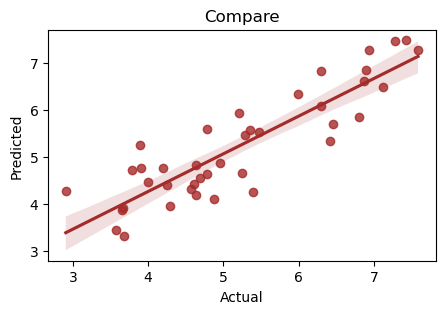

In [426]:
plt.figure(figsize=(5,3))
sns.regplot(x=compare['Actual'], y=compare['Predicted'], color='Brown')
plt.title('Compare')
plt.show()